In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

# Linear Regression Example: Ads Spend 

## Define the problem

**Given**: historical data of how much dollars a company spent on ads in different media (TV, radio, newspapers) and the respective sales.  

**Goal**: predict what will be the sales given a particular add spendings.
    

## Prepare the data (Data Preprocessing)

### Load the data

In [2]:
path_to_file = "https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/Advertising.csv"
df = pd.read_csv(path_to_file, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Get insight of the data (Prepare and clean)

**TV**:  dollars spent on TV ads for a single product (in thousands)  
**radio**: dollars spent on radio ads (in thousands)  
**newspaper**: dollars spent on newspaper ads (in thousands)    

**sales**: sales of a single product in a given market (in thousands)

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Check for NaN / dirty values

In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### Visualize with Seaborn

/media/nemsys/data/projects/courses/common/JupyterNotebooksExamples/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


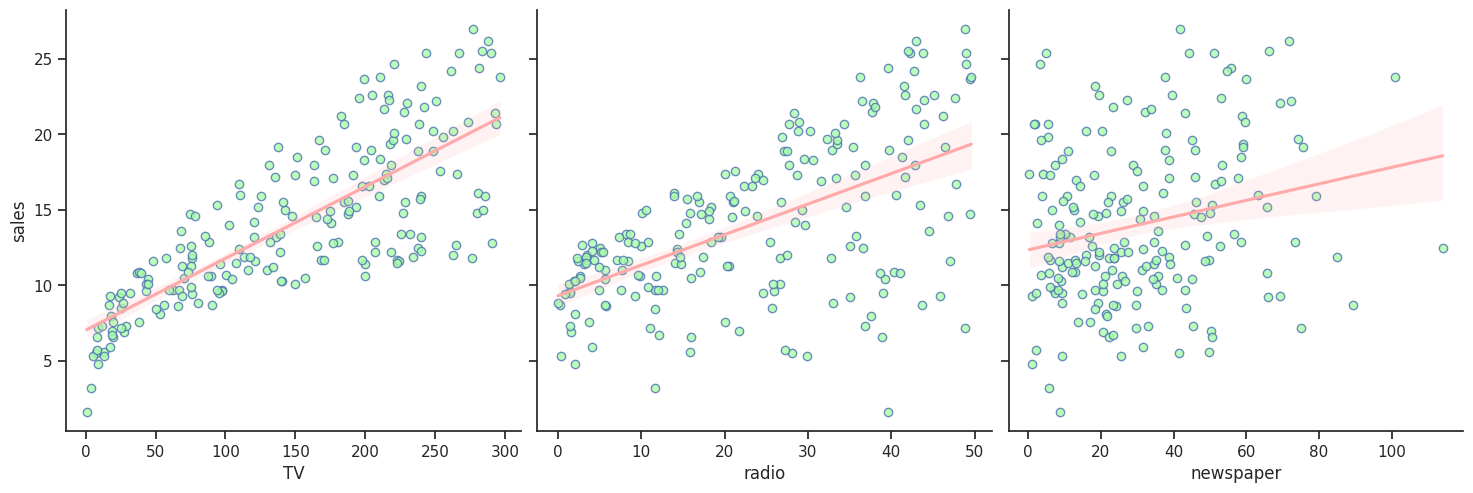

In [5]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,
             x_vars=['TV','radio','newspaper'],
             y_vars='sales',
             palette=sns.hls_palette(6, l=.6, s=.8),
             markers=["o"],
             plot_kws={'line_kws':{'color':'#FFAAAA'},
                       'scatter_kws':{'facecolors':'#AAFFAA'}},
             size=5, aspect=1,kind='reg')


In [6]:
# show correlations
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

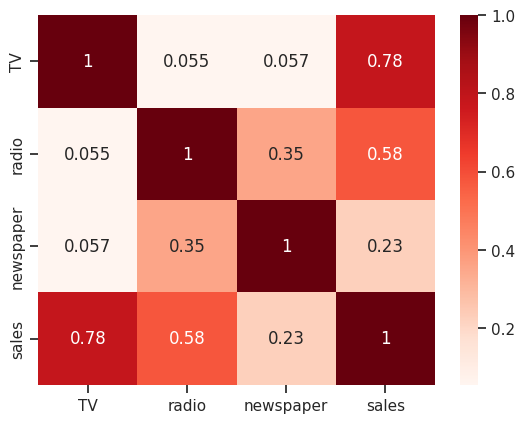

In [7]:
sns.heatmap(df.corr(),annot=True, cmap="Reds")

## Select features

Let's use all of the 3 features: 'TV', 'newspaper', 'radio'

In [8]:
X = df[['TV', 'newspaper', 'radio']]
y = df['sales']

## Separate the training data from the test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (150, 3)
X_test shape: (50, 3)
y_train shape: (150,)
y_test shape: (50,)


## Choose the model

We saw some linear correlation between Ads spends and sales, that's why we are going to start with LinearRegression.



In [10]:
from sklearn.linear_model import LinearRegression

## Train the model (fit the model)

In [11]:
lm = LinearRegression().fit(X_train,y_train)

In [12]:
# let's check the "learned" co-efficients:
print(lm.intercept_)
print(lm.coef_)

2.778303460245281
[0.04543356 0.00256809 0.19145654]


In [13]:
# Interpretation of the coefficients
print(f"Intercept (β0): {lm.intercept_}")
print(f"Coefficient for TV (β1): {lm.coef_[0]}")
print(f"Coefficient for Radio (β2): {lm.coef_[1]}")
print(f"Coefficient for Newspaper (β3): {lm.coef_[2]}")

Intercept (β0): 2.778303460245281
Coefficient for TV (β1): 0.045433558624649865
Coefficient for Radio (β2): 0.0025680908157005855
Coefficient for Newspaper (β3): 0.191456535617414


### Interpreting model coefficients

1. Intercept (β0): The expected sales when no money is spent on TV, radio, and newspaper advertising.
2. Coefficient for TV (β1): The change in sales for a one-unit (one dollar) increase in TV advertising spend, holding other factors constant.
3. Coefficient for Radio (β2): The change in sales for a one-unit (one dollar) increase in radio advertising spend, holding other factors constant.
4. Coefficient for Newspaper (β3): The change in sales for a one-unit (one dollar) increase in newspaper advertising spend, holding other factors constant.

So, we can say that spending an additional $1,000 on TV advertising is associated with an increase in sales of approximately 45,43 units of the product.

## Predict (classify unknown input sample)

In [14]:
y_pred = lm.predict(X_test)

In [15]:
print(y_pred[:3])

[16.38348211 20.92434957 21.61495426]


## Evaluate the model

Scikit-learn has predefined methods for most commonly used Regression Metrics: 
[scikit-learn - regression-metrics](https://scikit-learn.org/stable/modules/classes.html#regression-metrics)

### Mean Absolute Error (MAE)

is the mean of the absolute value of the errors

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

MAE is the average error and is the easiest to understand.

### Mean Squared Error (MSE) 

is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

MSE "punishes" larger errors, which tends to be useful in the real world

### Root Mean Squared Error (RMSE) 

is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

RMSE is interpretable in the "y" units.

### R-squared (Coefficient of Determination)**

R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

**Interpretation**:
- R-squared values range from 0 to 1.
- An R-squared of 1 indicates that the regression predictions perfectly fit the data.
- An R-squared of 0 indicates that the model does not explain any of the variability in the response data around its mean.

**Use Case**:
- R-squared is useful for understanding the explanatory power of the regression model.
- It tells you how much of the variance in the dependent variable can be explained by the independent variables.
- However, R-squared alone does not indicate whether the model predictions are biased or not. It is often used in conjunction with other metrics such as MAE or RMSE.

**Example**:
If an R-squared value of 0.85 is obtained, it means that 85% of the variability in the dependent variable can be explained by the model. The remaining 15% of the variability is due to other factors not included in the model.

**Limitations**:
- A high R-squared value does not necessarily mean a better model. It does not account for overfitting.
- It is not useful for assessing the predictive accuracy of the model.

By examining the R-squared value, you can gain insight into how well your independent variables (TV, radio, and newspapers) explain the variability of the dependent variable (sales) in our regression model.


In [ ]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared', r2_score(y_test, y_pred))

MAE:  1.4023124989385074
MSE:  2.880023730094193
RMSE:  1.697063266379363
R-squared 0.8935163320163657


### Interpretation of Regression Metrics Results

**Mean Absolute Error (MAE)**: 1.4023124989385074
- **Interpretation**: On average, the model's predictions are off by approximately 1.40 units of sales. MAE provides an easily interpretable measure of the average magnitude of errors in the predictions, without considering their direction (positive or negative).

**Mean Squared Error (MSE)**: 2.880023730094193
- **Interpretation**: The average of the squared differences between the predicted and actual sales values is about 2.88. MSE penalizes larger errors more than smaller ones, giving a higher weight to larger discrepancies between predicted and actual values.

**Root Mean Squared Error (RMSE)**: 1.697063266379363
- **Interpretation**: The square root of MSE is approximately 1.70, which is in the same units as the target variable (sales). RMSE is useful for understanding the error magnitude in the context of the data, providing a more intuitive measure of the average prediction error compared to MSE.

**R-squared (Coefficient of Determination)**: 0.8935163320163657
- **Interpretation**: Approximately 89.35% of the variability in sales can be explained by the advertising expenditures in TV, radio, and newspapers. This indicates that the model has a high explanatory power, meaning that the independent variables (TV, radio, and newspaper ad spend) effectively account for most of the variation in the dependent variable (sales). However, the remaining 10.65% of the variability in sales is due to factors not included in the model.

### Overfitting or underfitting

To evaluate whether our model is overfitting or underfitting, we need to compare the model's performance on the training data versus the testing data. 

Overfitting occurs when the model performs well on the training data but poorly on the testing data, indicating that it has learned the noise and specific details of the training data rather than the underlying pattern. 

Underfitting, on the other hand, occurs when the model performs poorly on both the training and testing data, indicating that it is too simple to capture the underlying pattern of the data.

In [ ]:
# Predictions on training data
y_train_pred = lm.predict(X_train)

# Predictions on testing data
y_test_pred = lm.predict(X_test)

# Calculate metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print("Training Data Metrics:")
print(f"MAE: {train_mae:.2f}")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R-squared: {train_r2:.2f}")

print("\nTesting Data Metrics:")
print(f"MAE: {test_mae:.2f}")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R-squared: {test_r2:.2f}")

Training Data Metrics:
MAE: 1.22
MSE: 2.77
RMSE: 1.66
R-squared: 0.90

Testing Data Metrics:
MAE: 1.40
MSE: 2.88
RMSE: 1.70
R-squared: 0.89


### Summary

The model shows good generalization with high R-squared values and low error metrics on both training and testing datasets. This suggests that the model is performing well and is neither overfitting nor underfitting.